# Классификация с помощью kNN. Кластеризация K-means

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Загрузим один из "игрушечных" датасетов из sklearn.

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

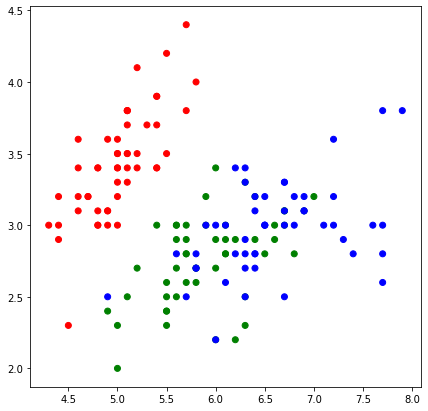

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [6]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Напишем функцию для вычисления точности

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

# Задание 1: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

- взвешенное голосование от номера соседа i можно определить как w(i) = 1/i

In [8]:
def knn_weight_by_number(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i]) 
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for n, d in enumerate(sorted(test_distances)[0:k]): # where n - neighbor's number
            classes[d[1]] += 1/(n+1) #weighted voting
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Построим график распределения классов.

In [9]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Проверим работу алгоритма при различных k

Точность алгоритма при k = 1: 0.667


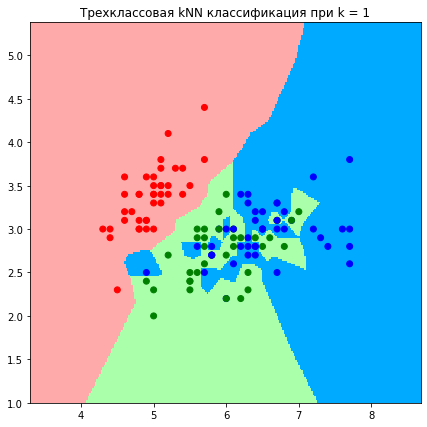

In [10]:
k = 1
y_pred = knn_weight_by_number(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 3: 0.667


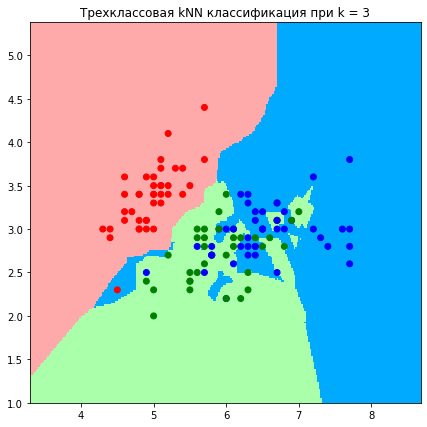

In [11]:
k = 3
y_pred = knn_weight_by_number(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 5: 0.733


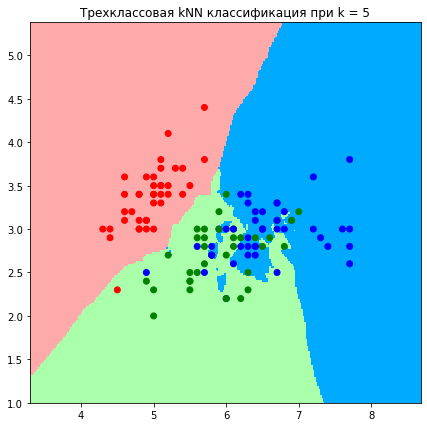

In [12]:
k = 5
y_pred = knn_weight_by_number(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 10: 0.767


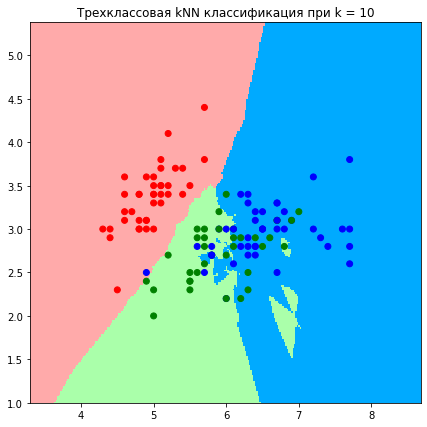

In [13]:
k = 10
y_pred = knn_weight_by_number(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

### Вывод: при увеличении k ближайших соседей точность алгоритма увеличивается, в отличии от реализации без их взвешивания  

# Задание 2: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

От расстояния $d$ веса можно определять как:

- $w(d) = q^{d}$,   $q \in (0,1)$;

In [14]:
def knn_weight_by_dist(x_train, y_train, x_test, k):
    q = 0.5
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])  
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]: 
            classes[d[1]] += (q ** d[0]) #weighted voting, where d[0]-dist, (q ** d[0]) - weight, q = 0.5
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

Точность алгоритма при k = 1: 0.667


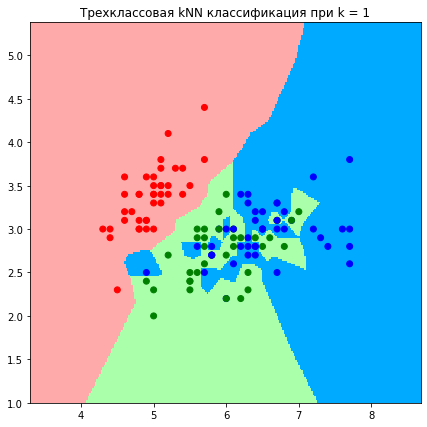

In [15]:
k = 1
y_pred = knn_weight_by_dist(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 3: 0.733


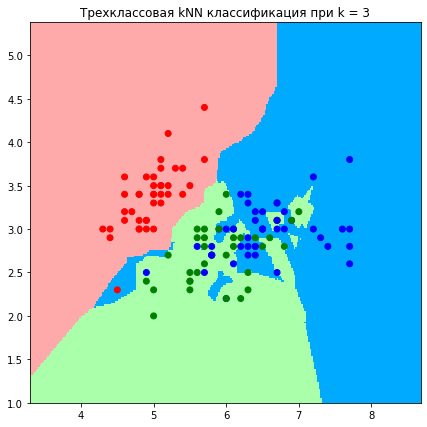

In [16]:
k = 3
y_pred = knn_weight_by_dist(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 5: 0.867


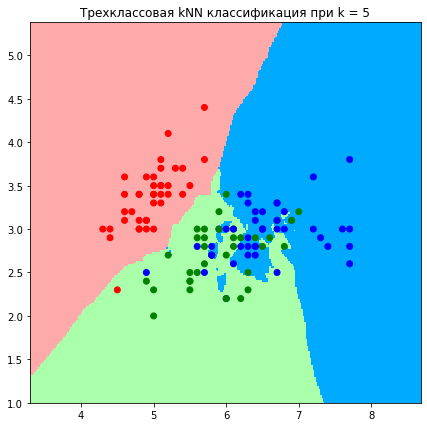

In [17]:
k = 5
y_pred = knn_weight_by_dist(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 7: 0.800


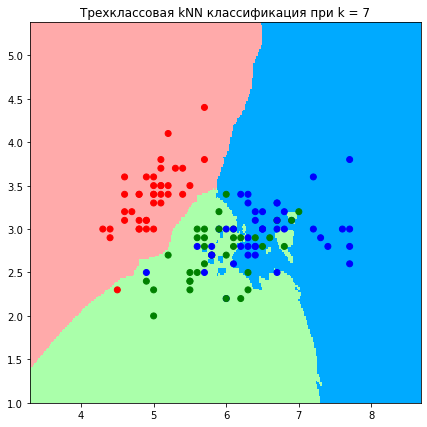

In [21]:
k = 7
y_pred = knn_weight_by_dist(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма при k = 10: 0.867


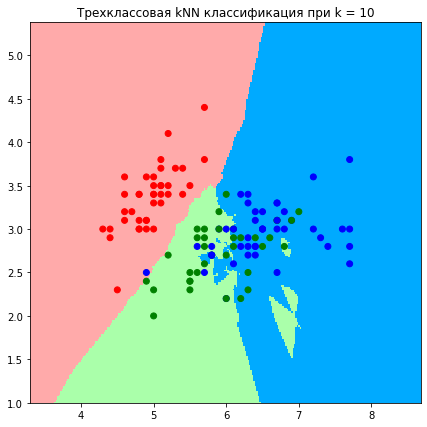

In [18]:
k = 10
y_pred = knn_weight_by_dist(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

### Вывод: при увеличении k>5 ближайших соседей точность алгоритма не увеличивается. При k=7 она уменьшается, при  k=10 остается такой же. В нашем случае k=5  оптимальное количество

# Задание 3: Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

In [19]:
weight_by_number_accuracy = []
weight_by_dist_accuracy = []
for k in range(1,100, 2):
    y_pred = knn_weight_by_number(X_train, y_train, X_test, k)
    weight_by_number_accuracy.append(accuracy(y_pred, y_test))
    
    y_pred = knn_weight_by_dist(X_train, y_train, X_test, k)
    weight_by_dist_accuracy.append(accuracy(y_pred, y_test))

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'k')]

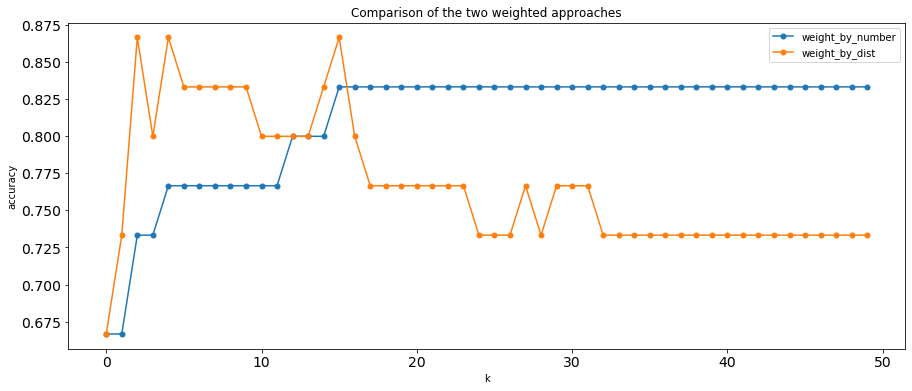

In [20]:
res = pd.DataFrame.from_dict({'weight_by_number': weight_by_number_accuracy, 'weight_by_dist': weight_by_dist_accuracy})

ax = res.plot(title='Comparison of the two weighted approaches', figsize=(15,6), fontsize=14, style='.-', ms=10)
ax.set(xlabel="k", ylabel="accuracy")

### Вывод: при увеличении k можно отметить, что при достижении значения k=15 в нашем случае алгоритм достигает оптимального значения: далее зависимость от номера соседа выходит на плато, а зависимость от расстояния становится обратной. 
### Зависимость от расстояния оптимальна при небольшом значении k, зависимость от номера соседа становится оптимальной только при достижении определённого k (в нашем случае 16)